<a href="https://colab.research.google.com/github/chittireddyshivani/Explainable_AI-Lab/blob/main/XAI_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas scikit-learn xgboost shap matplotlib seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
import shap
import os


In [ ]:
import pandas as pd

# Load Heart Disease dataset
dataset_path = "heart.csv"   # update with your path if needed
df = pd.read_csv(dataset_path)

# Dataset overview
print("Shape of dataset:", df.shape)
print(df.head())

# Info about columns
print("\nColumn names:", df.columns.tolist())
print("\nTarget distribution:")
print(df['target'].value_counts())


Shape of dataset: (1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Column names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Target distribution:
target
1    526
0    499
Name: count, dtype: int64


In [ ]:
# 3.1 Missing values handling:
print("Missing values per column:")
print(df.isna().sum())

# Example: fill numeric missing values with median
df = df.fillna(df.median(numeric_only=True))

print("\nAfter handling missing values:")
print(df.isna().sum())


Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

After handling missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# 3.2 Median imputation (for numeric columns, if any NaN exist)
df = df.fillna(df.median(numeric_only=True))

# 3.3 Feature/target split
X = df.drop(columns=["target"])
y = df["target"]

In [ ]:
from sklearn.model_selection import train_test_split

# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train/test sizes:", X_train.shape, X_test.shape)


Train/test sizes: (820, 13) (205, 13)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# 5A RandomForest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# 5B XGBoost
xgb_model = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    n_estimators=200
)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)


--- Random Forest ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



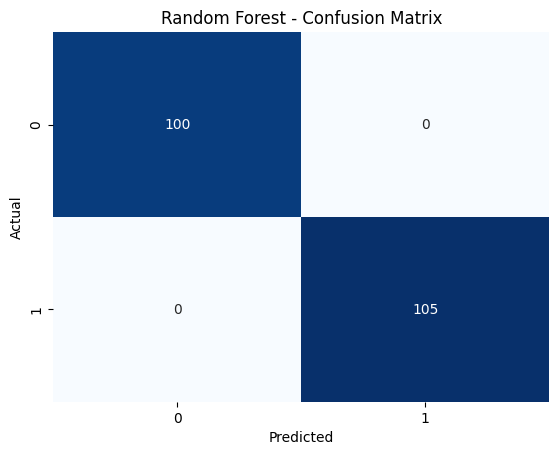


--- XGBoost ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



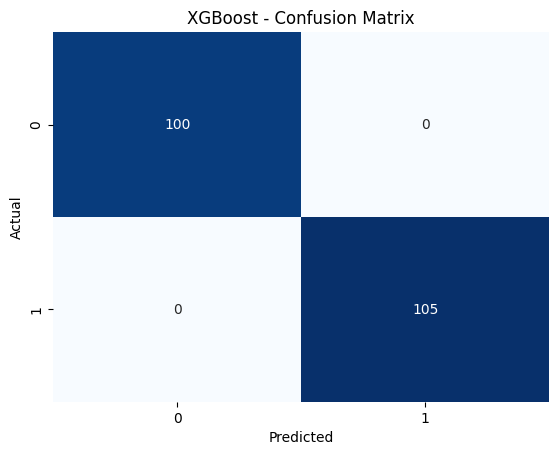

In [ ]:

# 6. Evaluation
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    print(f"\n--- {name} ---")
    print("Accuracy:", round(acc, 4))
    print("Precision:", round(prec, 4))
    print("Recall:", round(rec, 4))
    print("F1-score:", round(f1, 4))
    if roc is not None:
        print("ROC AUC:", round(roc, 4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate both models
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(xgb_model, X_test, y_test, "XGBoost")


In [ ]:
explainer_model = xgb_model

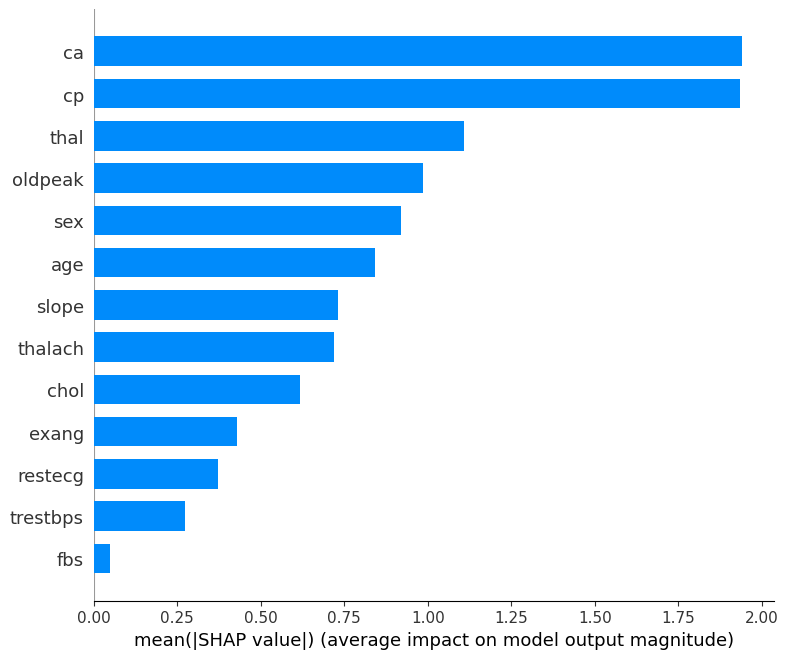

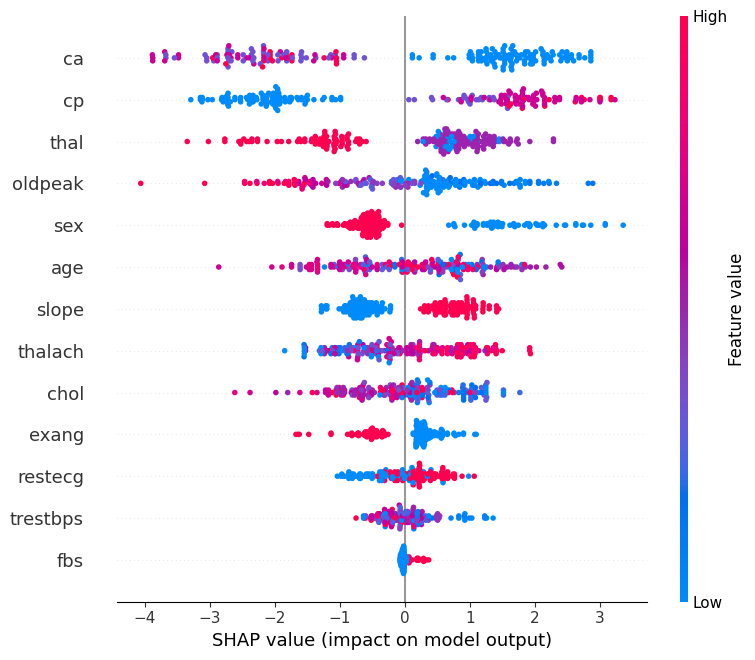

Actual label: 0
Predicted prob (Heart Disease=1): 0.00022493479


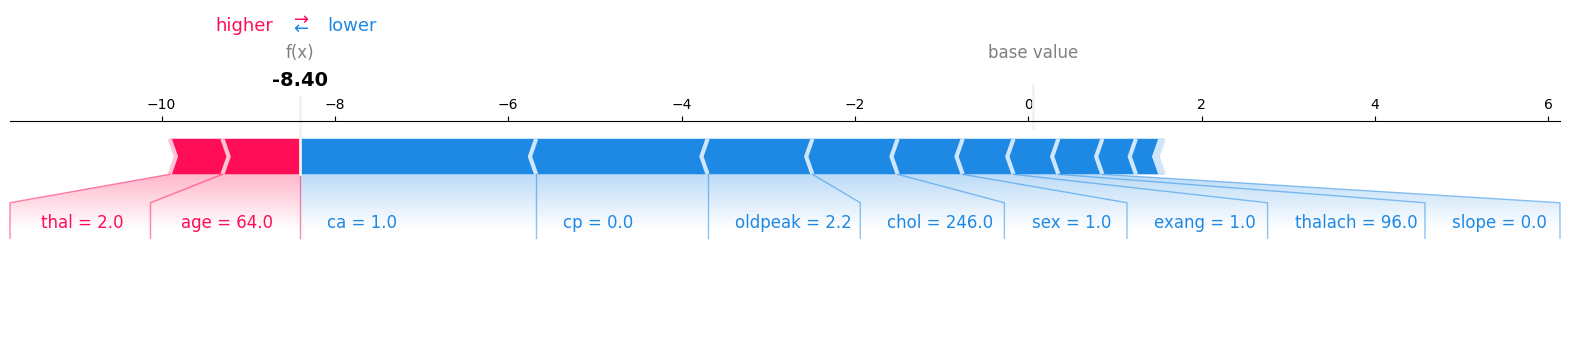

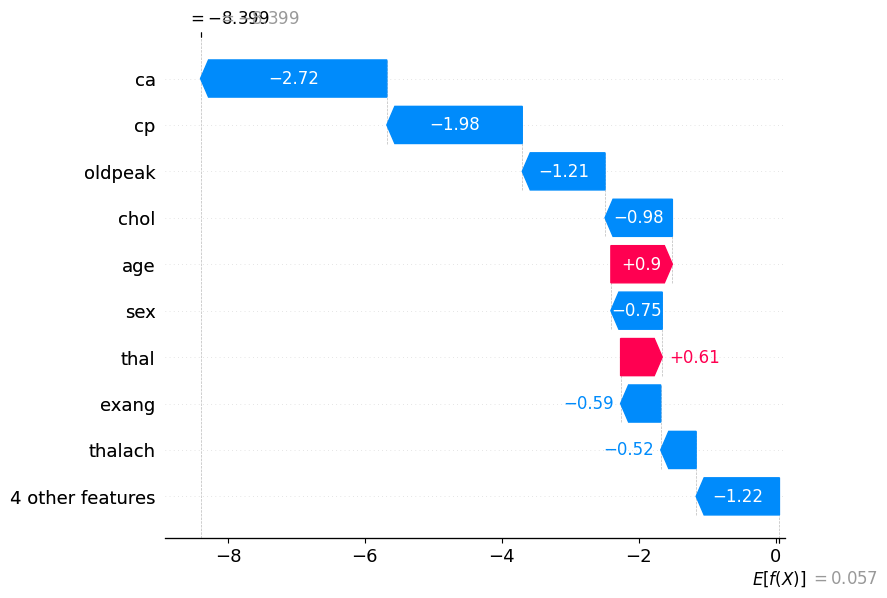

In [ ]:

# 7. SHAP Analysis
shap.initjs()

# Create explainer
explainer = shap.TreeExplainer(explainer_model)
shap_values = explainer.shap_values(X_test)

# If binary classification → take shap_values for class 1 (positive class)
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# 7.1 Summary plots
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)
shap.summary_plot(shap_values, X_test, show=True)

# 7.2 Force plot for one sample
i = 0
print("Actual label:", y_test.iloc[i])
print("Predicted prob (Heart Disease=1):", explainer_model.predict_proba(X_test.iloc[[i]])[0, 1])

shap.force_plot(
    explainer.expected_value,
    shap_values[i, :],
    X_test.iloc[i, :],
    matplotlib=True
)

# 7.3 Waterfall plot for the same sample
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values[i, :],
    feature_names=X_test.columns
)


In [ ]:
# 8. Compare Importances
try:
    # Built-in model feature importance
    built_in = explainer_model.feature_importances_
    fi = pd.Series(built_in, index=X_test.columns).sort_values(ascending=False)
    print("\nBuilt-in feature importance (top 10):")
    print(fi.head(10))

    # SHAP-based feature importance
    shap_rank = pd.Series(np.abs(shap_values).mean(axis=0), index=X_test.columns).sort_values(ascending=False)
    print("\nSHAP mean(|value|) top 10:")
    print(shap_rank.head(10))
except Exception as e:
    print("Could not get built-in importances:", e)



Built-in feature importance (top 10):
cp         0.281186
thal       0.146645
ca         0.127605
exang      0.095916
sex        0.068619
oldpeak    0.051536
age        0.043604
fbs        0.040422
restecg    0.033987
chol       0.031428
dtype: float32

SHAP mean(|value|) top 10:
ca         1.940027
cp         1.933195
thal       1.108999
oldpeak    0.985019
sex        0.920165
age        0.841657
slope      0.731689
thalach    0.717597
chol       0.617158
exang      0.427747
dtype: float32


In [ ]:
# 9. Top-5 SHAP Features
shap_importance = pd.Series(
    np.abs(shap_values).mean(axis=0),
    index=X_test.columns
).sort_values(ascending=False)

top5 = shap_importance.head(5)

print("\nTop-5 SHAP features:")
print(top5)

# Correlation between feature values and SHAP values
for feat in top5.index:
    vals = X_test[feat]
    corr = np.corrcoef(vals, shap_values[:, X_test.columns.get_loc(feat)])[0, 1]
    print(f"Feature: {feat}, correlation between value and SHAP: {corr:.3f}")



Top-5 SHAP features:
ca         1.940027
cp         1.933195
thal       1.108999
oldpeak    0.985019
sex        0.920165
dtype: float32
Feature: ca, correlation between value and SHAP: -0.754
Feature: cp, correlation between value and SHAP: 0.928
Feature: thal, correlation between value and SHAP: -0.759
Feature: oldpeak, correlation between value and SHAP: -0.845
Feature: sex, correlation between value and SHAP: -0.939



Completed. Files saved:
 - heart_shap_summary_bar.png
 - heart_shap_feature_importance.csv


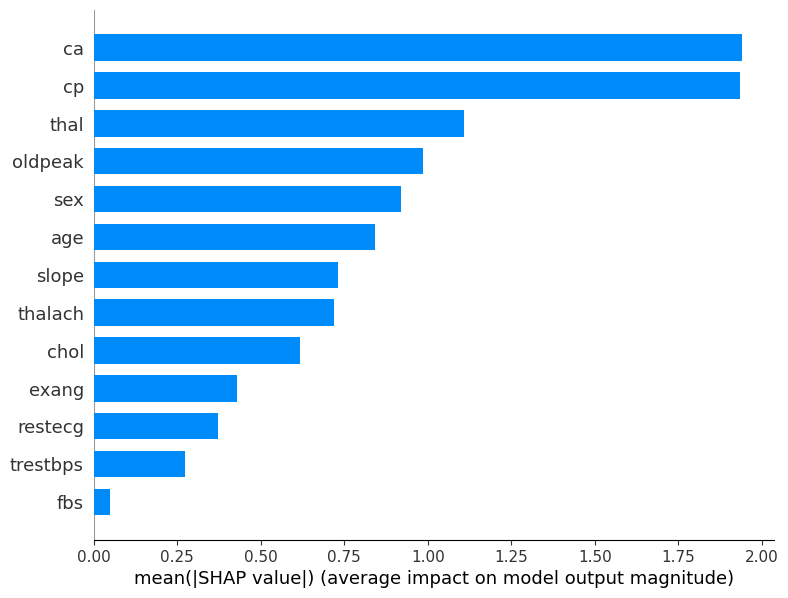

In [ ]:
# 10. Save Outputs

# Save SHAP summary bar plot
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.gcf().set_size_inches(8, 6)
plt.savefig("heart_shap_summary_bar.png", bbox_inches='tight')

# Save SHAP feature importance values to CSV
shap_importance.to_csv("heart_shap_feature_importance.csv")

print("\nCompleted. Files saved:")
print(" - heart_shap_summary_bar.png")
print(" - heart_shap_feature_importance.csv")
